## Objetives

Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and define auxiliary functions

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import requests

In [54]:
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix, accuracy_score

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

## Load the dataframe

In [55]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
local_path = "./dataset_part_2.csv"

response = requests.get(url)

if (response.status_code == 200):
    with open(local_path, 'wb') as file:
        file.write(response.content)
    print(f'Download success, status code {response.status_code}')
else:
    print(f'Download error, status code {response.status_code}')

path = 'dataset_part_2.csv'

Download success, status code 200


In [56]:
df = pd.read_csv(path)
print(df.shape)
df.head()

(90, 18)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


#### Task 1. Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [57]:
Y = df['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

### Task 2. Standardize the data in X then reassign it to the variable X using the transform provided below.

In [58]:
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

In [59]:
X = df[['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Longitude', 'Latitude']]
X

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude
0,1,6104.959412,1,False,False,False,1.0,0,-80.577366,28.561857
1,2,525.000000,1,False,False,False,1.0,0,-80.577366,28.561857
2,3,677.000000,1,False,False,False,1.0,0,-80.577366,28.561857
3,4,500.000000,1,False,False,False,1.0,0,-120.610829,34.632093
4,5,3170.000000,1,False,False,False,1.0,0,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,-80.603956,28.608058
86,87,15400.000000,3,True,True,True,5.0,2,-80.603956,28.608058
87,88,15400.000000,6,True,True,True,5.0,5,-80.603956,28.608058
88,89,15400.000000,3,True,True,True,5.0,2,-80.577366,28.561857


In [60]:
# Standardize
numerical_features = ['FlightNumber', 'PayloadMass', 'Flights', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Longitude', 'Latitude']
X[numerical_features] = transform.fit_transform(X[numerical_features])
X

C:\Users\matia\AppData\Local\Temp\ipykernel_9596\2801329635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = transform.fit_transform(X[numerical_features])


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude
0,-1.712912,-1.948145e-16,-0.653913,False,-0.835532,-1.933091,-1.575895,-0.973440,0.411430,-0.417073
1,-1.674419,-1.195232e+00,-0.653913,False,-0.835532,-1.933091,-1.575895,-0.973440,0.411430,-0.417073
2,-1.635927,-1.162673e+00,-0.653913,False,-0.835532,-1.933091,-1.575895,-0.973440,0.411430,-0.417073
3,-1.597434,-1.200587e+00,-0.653913,False,-0.835532,-1.933091,-1.575895,-0.973440,-2.433736,2.433637
4,-1.558942,-6.286706e-01,-0.653913,False,-0.835532,-1.933091,-1.575895,-0.973440,0.411430,-0.417073
...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,True,1.196843,0.517306,0.945537,0.202528,0.409541,-0.395376
86,1.597434,1.991005e+00,1.003894,True,1.196843,0.517306,0.945537,0.202528,0.409541,-0.395376
87,1.635927,1.991005e+00,3.490605,True,1.196843,0.517306,0.945537,1.966480,0.409541,-0.395376
88,1.674419,1.991005e+00,1.003894,True,1.196843,0.517306,0.945537,0.202528,0.411430,-0.417073


### Task 3. Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [61]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
Y_test.shape

(18,)

### Task 4. Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [63]:
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs']}
ls = LogisticRegression()
logreg_cv = GridSearchCV(ls, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

c:\Users\matia\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\matia\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\matia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\matia\anaconda3\Lib\site-packages\sklearn\linear_model\_lo

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [64]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8053571428571427


### Task 5. Calculate the accuracy on the test data using the method <code>score</code>:

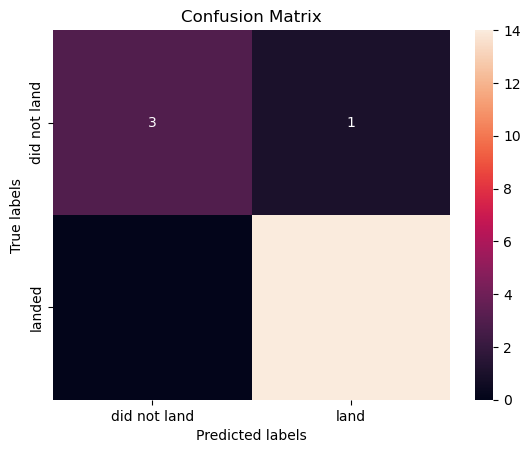

In [65]:
# Predict labels for the test data
yhat = logreg_cv.predict(X_test)

# Plot confucion matrix
plot_confusion_matrix(Y_test,yhat)

### Task 6. Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [66]:
svm = SVC()

# Define the hyperparameter search space
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# Create object GridSearch with svm and search parameters
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Adjust the GridSearchCV object
svm_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.8875


### Task 7. Calculate the accurancy on the test data using the method <code>score</code>

Accurancy of data test:  0.9861111111111112


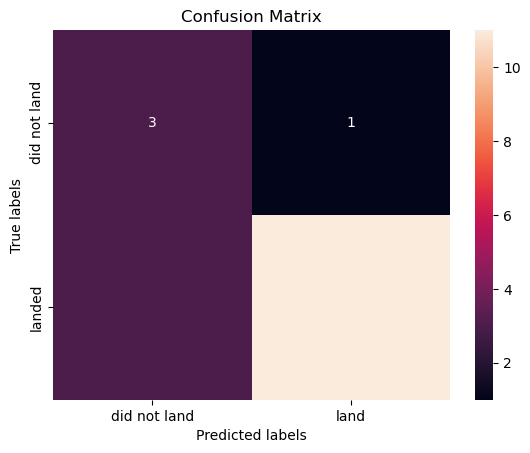

In [67]:
accurancy_test = svm_cv.score(X_train, Y_train)
print('Accurancy of data test: ', accurancy_test)

#Ploting confusion matrix
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Task 8. Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [68]:
tree = DecisionTreeClassifier()

# Define the hyperparameter search space
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Create a GridSearchCV object with decision tree classifier and parameter grid
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object
tree_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

c:\Users\matia\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\matia\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\matia\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\matia\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8732142857142856


### Task 9. Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

Accurancy on the test data:  0.8888888888888888


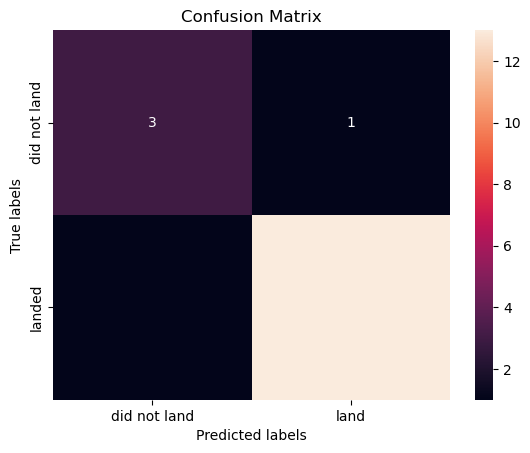

In [69]:
accurancy_test = tree_cv.score(X_test, Y_test)
print('Accurancy on the test data: ', accurancy_test)

# Ploting confusion matrix
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Task 10. Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [71]:
# Create a KNN classifier object
KNN = KNeighborsClassifier()

# Define the parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a GridSearchCV object with KNN classifier and parameter grid
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object
knn_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Tuned hyperparameters: (best parameters)", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

Tuned hyperparameters: (best parameters) {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2}
Accuracy: 0.8321428571428571


### Task 11. Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

Accuracy on test data: 0.9444444444444444


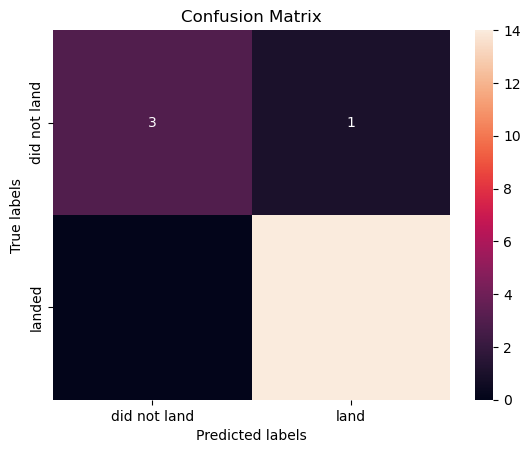

In [72]:
# Calculate the accuracy on the test data using the score method
accuracy_test = knn_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy_test)

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Task 12. Find the method performs best:

In [73]:
# Calculate accuracy of each model on the test data
accuracy_tree = tree_cv.score(X_test, Y_test)
accuracy_svm = svm_cv.score(X_test, Y_test)
accuracy_logreg = logreg_cv.score(X_test, Y_test)
accuracy_knn = knn_cv.score(X_test, Y_test)

# Print the accuracies
print("Accuracy of Decision Tree:", accuracy_tree)
print("Accuracy of SVM:", accuracy_svm)
print("Accuracy of Logistic Regression:", accuracy_logreg)
print("Accuracy of KNN:", accuracy_knn)

# Find the method with the highest accuracy
best_accuracy = max(accuracy_tree, accuracy_svm, accuracy_logreg, accuracy_knn)
best_method = ""
if best_accuracy == accuracy_tree:
    best_method = "Decision Tree"
elif best_accuracy == accuracy_svm:
    best_method = "SVM"
elif best_accuracy == accuracy_logreg:
    best_method = "Logistic Regression"
elif best_accuracy == accuracy_knn:
    best_method = "KNN"

print("The best-performing method is:", best_method, "with an accuracy of", best_accuracy)

Accuracy of Decision Tree: 0.8888888888888888
Accuracy of SVM: 0.7777777777777778
Accuracy of Logistic Regression: 0.9444444444444444
Accuracy of KNN: 0.9444444444444444
The best-performing method is: Logistic Regression with an accuracy of 0.9444444444444444
